In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [28]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def loadData(fileName, columnName):
    data = pd.read_csv(base_url + fileName) \
             .drop(['Lat', 'Long'], axis=1) \
             .melt(id_vars=['Province/State', 'Country/Region'], var_name='date', value_name=columnName) \
             .fillna('<all>')
    data['date'] = data['date'].astype('datetime64[ns]')
    return data

In [29]:
all_data = loadData("time_series_19-covid-Confirmed.csv", "CumConfirmed") \
    .merge(loadData("time_series_19-covid-Deaths.csv", "CumDeaths")) \
    .merge(loadData("time_series_19-covid-Recovered.csv", "CumRecovered"))

In [30]:
all_data.head()

,Province/State,Country/Region,date,CumConfirmed,CumDeaths,CumRecovered
0,<all>,Thailand,2020-01-22,2,0,0
1,<all>,Japan,2020-01-22,2,0,0
2,<all>,Singapore,2020-01-22,0,0,0
3,<all>,Nepal,2020-01-22,0,0,0
4,<all>,Malaysia,2020-01-22,0,0,0


In [31]:
# Opening csv with human development index
dev_index = pd.read_csv('developed_countries.csv')
dev_index.head()

,name,humanDevelopmentIndex,pop2020
0,Norway,0.953,5421.241
1,Switzerland,0.944,8654.622
2,Australia,0.939,25499.884
3,Ireland,0.938,4937.786
4,Germany,0.936,83783.942


In [57]:
# Creating and pickling population dictionary
pop_dict = dict(zip(dev_index.name, dev_index.pop2020))

with open('./pickled_files/population_dict.pkl', 'wb') as f:
    pickle.dump(pop_dict, f)
pop_dict

{'Norway': 5421.241,
 'Switzerland': 8654.622,
 'Australia': 25499.884,
 'Ireland': 4937.786,
 'Germany': 83783.942,
 'Iceland': 341.243,
 'Sweden': 10099.265,
 'Hong Kong': 7496.981,
 'Singapore': 5850.342,
 'Netherlands': 17134.872,
 'Denmark': 5792.202,
 'Canada': 37742.154,
 'United States': 331002.651,
 'United Kingdom': 67886.011,
 'Finland': 5540.72,
 'New Zealand': 4822.233,
 'Belgium': 11589.623,
 'Liechtenstein': 38.128,
 'Japan': 126476.461,
 'Austria': 9006.398,
 'Luxembourg': 625.978,
 'South Korea': 51269.185,
 'Israel': 8655.535,
 'France': 65273.511,
 'Slovenia': 2078.938,
 'Spain': 46754.778,
 'Czech Republic': 10708.981,
 'Italy': 60461.826,
 'Malta': 441.543,
 'Estonia': 1326.535,
 'Greece': 10423.054,
 'Cyprus': 1207.359,
 'Poland': 37846.611,
 'United Arab Emirates': 9890.402,
 'Lithuania': 2722.289,
 'Andorra': 77.265,
 'Qatar': 2881.053,
 'Slovakia': 5459.642,
 'Brunei': 437.479,
 'Saudi Arabia': 34813.871,
 'Portugal': 10196.709,
 'Latvia': 1886.198,
 'Bahrain':

In [56]:
# Creating and pickling index dictionary
index_dict = dict(zip(dev_index.name, dev_index.humanDevelopmentIndex))
with open('./pickled_files/dev_index_dict.pkl',  'wb') as f:
    pickle.dump(index_dict, f)
index_dict

{'Norway': 0.953,
 'Switzerland': 0.944,
 'Australia': 0.939,
 'Ireland': 0.938,
 'Germany': 0.936,
 'Iceland': 0.935,
 'Sweden': 0.933,
 'Hong Kong': 0.933,
 'Singapore': 0.932,
 'Netherlands': 0.931,
 'Denmark': 0.929,
 'Canada': 0.926,
 'United States': 0.924,
 'United Kingdom': 0.922,
 'Finland': 0.92,
 'New Zealand': 0.917,
 'Belgium': 0.916,
 'Liechtenstein': 0.916,
 'Japan': 0.909,
 'Austria': 0.908,
 'Luxembourg': 0.904,
 'South Korea': 0.903,
 'Israel': 0.903,
 'France': 0.901,
 'Slovenia': 0.896,
 'Spain': 0.891,
 'Czech Republic': 0.888,
 'Italy': 0.88,
 'Malta': 0.878,
 'Estonia': 0.871,
 'Greece': 0.87,
 'Cyprus': 0.869,
 'Poland': 0.865,
 'United Arab Emirates': 0.863,
 'Lithuania': 0.858,
 'Andorra': 0.858,
 'Qatar': 0.856,
 'Slovakia': 0.855,
 'Brunei': 0.853,
 'Saudi Arabia': 0.853,
 'Portugal': 0.847,
 'Latvia': 0.847,
 'Bahrain': 0.846,
 'Chile': 0.843,
 'Hungary': 0.838,
 'Croatia': 0.831,
 'Argentina': 0.825,
 'Oman': 0.821,
 'Russia': 0.816,
 'Montenegro': 0.814,


In [34]:
# Grouping data by country
grouped_country = all_data.groupby('Country/Region').max().drop('Province/State', axis=1).reset_index()
grouped_country.head()

,Country/Region,date,CumConfirmed,CumDeaths,CumRecovered
0,Afghanistan,2020-03-22,40,1,1
1,Albania,2020-03-22,89,2,2
2,Algeria,2020-03-22,201,17,65
3,Andorra,2020-03-22,113,1,1
4,Angola,2020-03-22,2,0,0


In [35]:
grouped_country['dev_index'] = grouped_country['Country/Region'].map(index_dict)
grouped_country['population'] = grouped_country['Country/Region'].map(pop_dict)
grouped_country.set_index('Country/Region', inplace=True)
grouped_country.head()

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population
Country/Region,,,,,,
Afghanistan,2020-03-22,40,1,1,0.498,38928.346
Albania,2020-03-22,89,2,2,0.785,2877.797
Algeria,2020-03-22,201,17,65,0.754,43851.044
Andorra,2020-03-22,113,1,1,0.858,77.265
Angola,2020-03-22,2,0,0,0.581,32866.272


In [36]:
# Checking for missing values
grouped_country[grouped_country['dev_index'].isna()]

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population
Country/Region,,,,,,
"Bahamas, The",2020-03-22,4,0,0,NaN,NaN
Cabo Verde,2020-03-22,3,0,0,NaN,NaN
Congo (Brazzaville),2020-03-22,3,0,0,NaN,NaN
Congo (Kinshasa),2020-03-22,30,1,0,NaN,NaN
Cote d'Ivoire,2020-03-22,14,0,1,NaN,NaN
Cruise Ship,2020-03-22,712,8,325,NaN,NaN
Czechia,2020-03-22,1120,1,6,NaN,NaN
East Timor,2020-03-22,1,0,0,NaN,NaN
Eswatini,2020-03-22,4,0,0,NaN,NaN


In [37]:
grouped_country.loc['US']

date            2020-03-22 00:00:00
CumConfirmed                  15793
CumDeaths                       117
CumRecovered                      6
dev_index                       NaN
population                      NaN
Name: US, dtype: object

In [38]:
# Adding missing values

grouped_country.loc['US', 'dev_index'] = 0.924
grouped_country.loc['Korea, South', 'dev_index'] = 0.903
grouped_country.loc['US', 'population'] = 331002.651
grouped_country.loc['Korea, South', 'population'] = 51269.185

grouped_country

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population
Country/Region,,,,,,
Afghanistan,2020-03-22,40,1,1,0.498,38928.346
Albania,2020-03-22,89,2,2,0.785,2877.797
Algeria,2020-03-22,201,17,65,0.754,43851.044
Andorra,2020-03-22,113,1,1,0.858,77.265
Angola,2020-03-22,2,0,0,0.581,32866.272
...,...,...,...,...,...,...
Uzbekistan,2020-03-22,43,0,0,0.710,33469.203
Venezuela,2020-03-22,70,0,15,0.761,28435.940
Vietnam,2020-03-22,113,0,17,0.694,97338.579


In [39]:
grouped_country['DeathRate'] = (grouped_country.CumDeaths/grouped_country.CumConfirmed)*100
grouped_country.head()

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population,DeathRate
Country/Region,,,,,,,
Afghanistan,2020-03-22,40,1,1,0.498,38928.346,2.500000
Albania,2020-03-22,89,2,2,0.785,2877.797,2.247191
Algeria,2020-03-22,201,17,65,0.754,43851.044,8.457711
Andorra,2020-03-22,113,1,1,0.858,77.265,0.884956
Angola,2020-03-22,2,0,0,0.581,32866.272,0.000000


In [40]:
# sort df by Count column
grouped_country = grouped_country.sort_values(['DeathRate'], ascending=False)
grouped_country.head()

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population,DeathRate
Country/Region,,,,,,,
Sudan,2020-03-22,2,1,0,0.502,43849.260,50.000000
Gabon,2020-03-22,5,1,0,0.702,2225.734,20.000000
Guyana,2020-03-22,7,1,0,0.654,786.552,14.285714
San Marino,2020-03-22,160,20,4,NaN,NaN,12.500000
Indonesia,2020-03-22,514,48,29,0.694,273523.615,9.338521


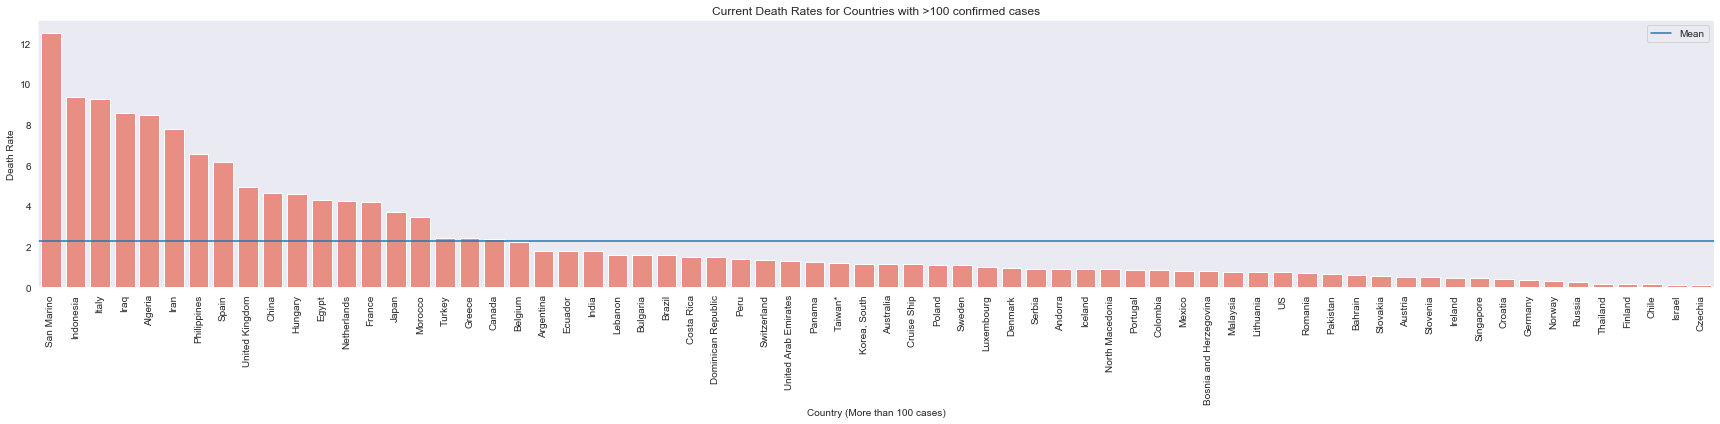

In [53]:
greater_one = grouped_country[grouped_country['DeathRate'] > 0]

more_than_100 = greater_one[greater_one.CumConfirmed > 100]

mean = more_than_100.DeathRate.mean()


fig, ax = plt.subplots(figsize=(24, 6))
ax = sns.barplot(x=more_than_100.index, y=more_than_100.DeathRate, data=more_than_100, color="salmon")
ax.axhline(mean, label='Mean')
ax.set_title('Current Death Rates for Countries with >100 confirmed cases')
plt.xticks(rotation=90)
ax.set(xlabel='Country (More than 100 cases)', ylabel='Death Rate')
plt.tight_layout()
plt.legend()
plt.savefig('current_death_rates.png', dpi=600)

In [42]:
more_than_100.head()

,date,CumConfirmed,CumDeaths,CumRecovered,dev_index,population,DeathRate
Country/Region,,,,,,,
San Marino,2020-03-22,160,20,4,NaN,NaN,12.500000
Indonesia,2020-03-22,514,48,29,0.694,273523.615,9.338521
Italy,2020-03-22,59138,5476,7024,0.880,60461.826,9.259698
Iraq,2020-03-22,233,20,57,0.685,40222.493,8.583691
Algeria,2020-03-22,201,17,65,0.754,43851.044,8.457711


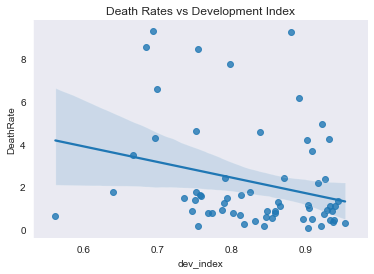

In [43]:
fix, ax = plt.subplots()


sns.set_style('dark')
size = dev_index.pop2020
ax = sns.regplot(x="dev_index", y="DeathRate", data=more_than_100)
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('death_rate_v_dev_index.png', dpi=600)

/Users/rogerlefort/anaconda3/envs/corona/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


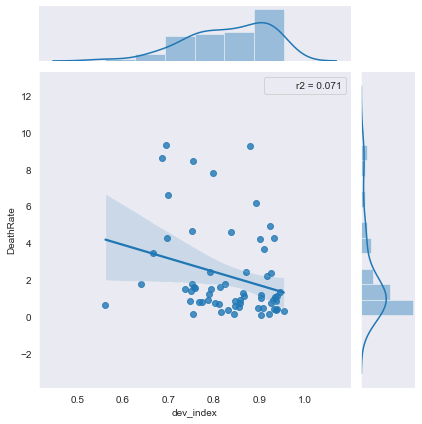

In [47]:
from scipy import stats

x = more_than_100.dev_index
y = more_than_100.DeathRate

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)
plt.savefig('death_rate_v_dev_index_pearson.png', dpi=600)


ax = sns.jointplot("total_bill", "tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

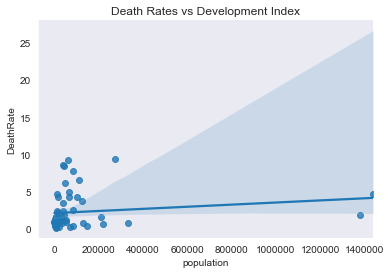

In [51]:
fix, ax = plt.subplots()


sns.set_style('dark')
size = dev_index.pop2020
ax = sns.regplot(x="population", y="DeathRate", data=more_than_100)
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('death_rate_v_population.png', dpi=600)

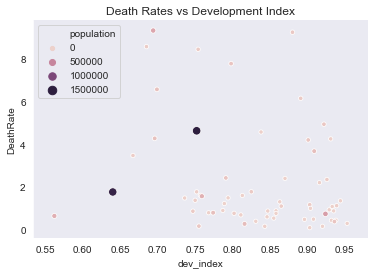

In [44]:
fix, ax = plt.subplots()

sns.set_style('dark')
#size = dev_index['pop2020']
ax = sns.scatterplot(x="dev_index", y="DeathRate", data=more_than_100, size='population', hue="population")
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('death_rate_v_dev_index_2.png', dpi=600)

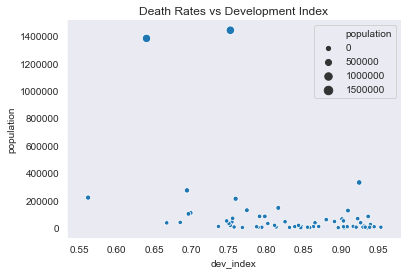

In [45]:
fix, ax = plt.subplots()

sns.set_style('dark')
#size = dev_index['pop2020']
ax = sns.scatterplot(x="dev_index", y="population", data=more_than_100, size='population')
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('pop_v_dev_index.png', dpi=600)